<a href="https://colab.research.google.com/github/YNWA-Algo/Credit-Card-Fraud-Detection/blob/main/CreditcardfraudAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# __Predicting Credit Card Fraud__




## Objectives

Leverage dataset from Kaggle to train a ML model to predict fraudulent transcations.

## Quick Summary about the Data

The data set contains dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities.
Nidula Elgiriyewithana. (2023). Credit Card Fraud Detection Dataset 2023 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/6492730


----


## Load Files and then Setup Libraries


*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


In [1]:
# Step 1: Install Kaggle API
!pip install -q kaggle

# Step 2: Upload kaggle.json (choose the kaggle.json file from your local machine since you already downloaded it and saved it)
from google.colab import files
files.upload()

# Step 3: Move kaggle.json to the correct location in Colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the dataset using the Kaggle API
!kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2023 --unzip

# Step 5: Load the data into a pandas DataFrame
import pandas as pd

# Assuming the dataset is a CSV file, load it
df = pd.read_csv("creditcard_2023.csv")  # Update the file name if it's different
df.head()  # Display the first 5 rows


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
License(s): other
100% 143M/143M [00:00<00:00, 200MB/s]
100% 143M/143M [00:00<00:00, 201MB/s]


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### Importing Required Libraries


In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
%matplotlib inline

# Exploratory Data Analysis

In [3]:
df.dtypes

,0
id,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
##Check if there is any null values in the dataframe
df.isnull().values.any()

False

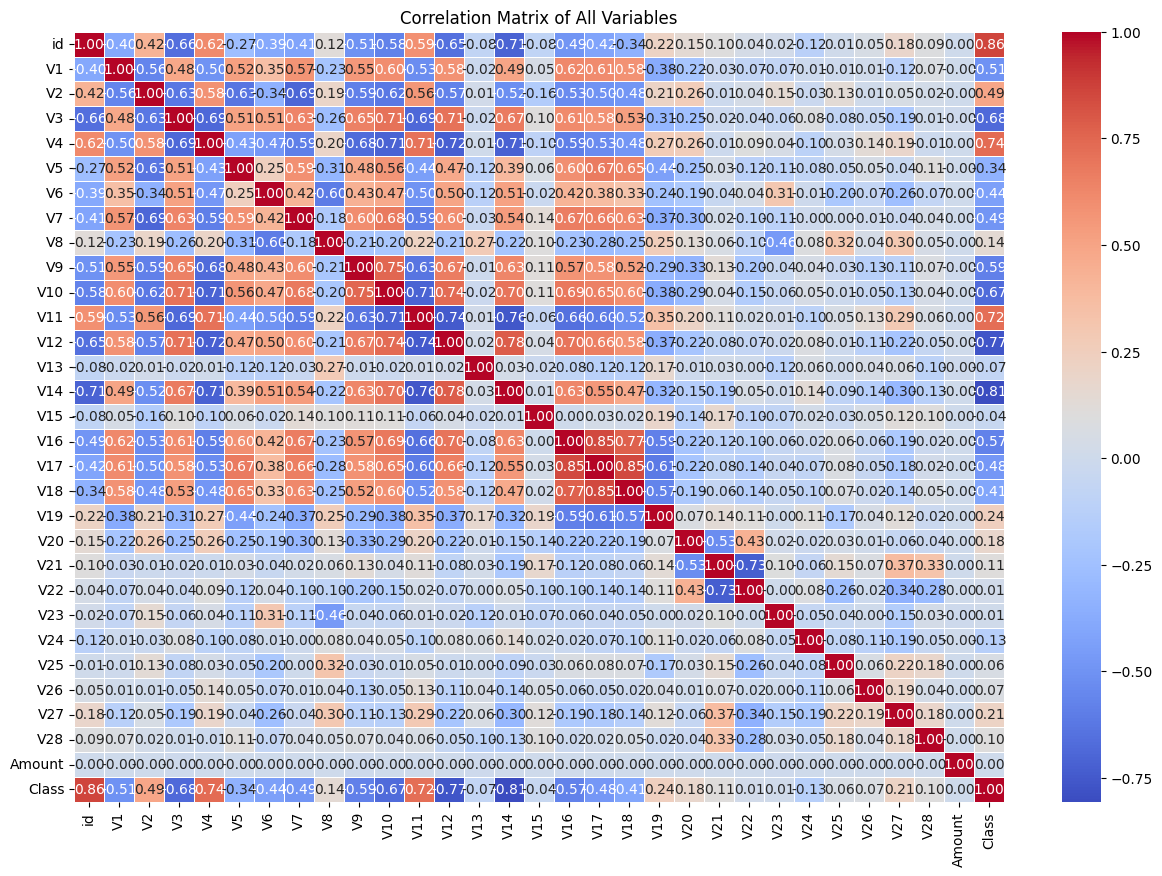

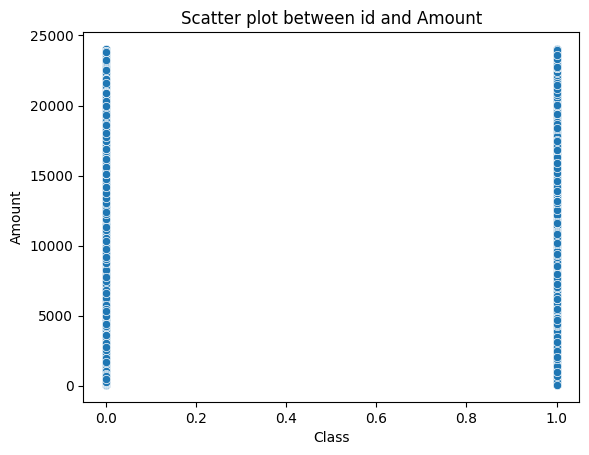

In [6]:
#Drop the ID column
#df = df.drop('id', axis=1, errors='ignore')

#Calculate the correlation matrix
correlation_matrix = df.corr()

#Plot a heatmap of the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of All Variables')
plt.show()

# Scatter plot of two specific variables
sns.scatterplot(data=df, x='Class', y='Amount')
plt.title('Scatter plot between id and Amount')
plt.show()

In [7]:
#Filter correlations above the absolute value of 0.7
high_corr = correlation_matrix[(correlation_matrix.abs() > 0.7) & (correlation_matrix != 1.0)]

# Drop rows and columns that are all NaN (no correlations above threshold)
high_corr = high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)

#Display the filtered correlation matrix
print("Correlations with absolute value greater than 0.7:")
high_corr

Correlations with absolute value greater than 0.7:


,id,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V21,V22,Class
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.709346,NaN,NaN,NaN,NaN,NaN,0.864283
V3,NaN,NaN,NaN,NaN,0.707676,NaN,0.705497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V4,NaN,NaN,NaN,NaN,-0.712839,0.708642,-0.722597,-0.714847,NaN,NaN,NaN,NaN,NaN,0.735981
V9,NaN,NaN,NaN,NaN,0.748487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V10,NaN,0.707676,-0.712839,0.748487,NaN,-0.713066,0.736783,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V11,NaN,NaN,0.708642,NaN,-0.713066,NaN,-0.744642,-0.762322,NaN,NaN,NaN,NaN,NaN,0.724278
V12,NaN,0.705497,-0.722597,NaN,0.736783,-0.744642,NaN,0.783878,NaN,NaN,NaN,NaN,NaN,-0.768579
V14,-0.709346,NaN,-0.714847,NaN,NaN,-0.762322,0.783878,NaN,NaN,NaN,NaN,NaN,NaN,-0.805669
V16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.848095,0.767992,NaN,NaN,NaN
V17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.848095,NaN,0.851366,NaN,NaN,NaN


In [8]:
# Descriptive statistics for the 'Amount' column
amount_stats = df['Amount'].describe().round(2)

# Display the descriptive statistics
print(amount_stats)


count    568630.00
mean      12041.96
std        6919.64
min          50.01
25%        6054.89
50%       12030.15
75%       18036.33
max       24039.93
Name: Amount, dtype: float64


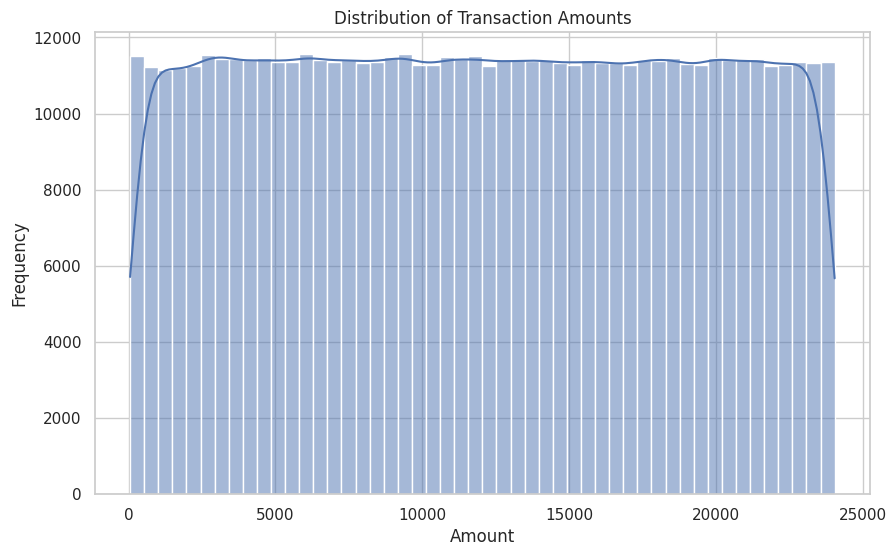

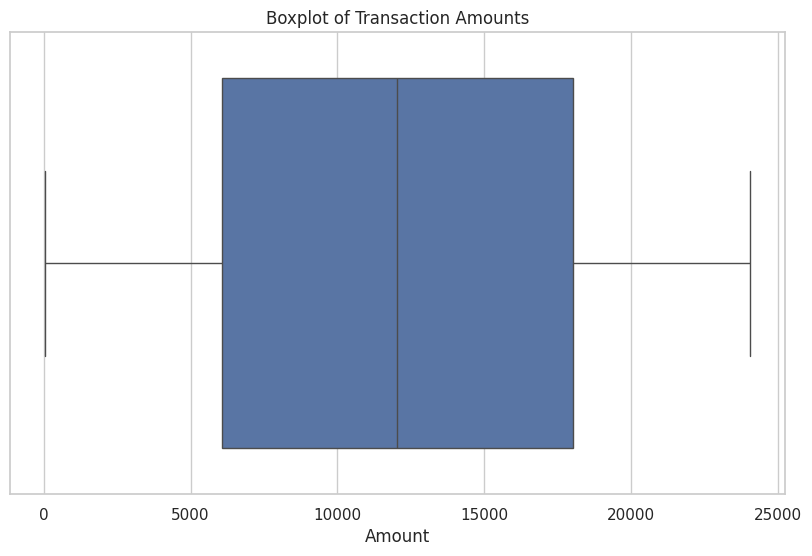

In [9]:

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and axis for the histogram
plt.figure(figsize=(10, 6))

# Plot histogram for 'Amount' column
sns.histplot(df['Amount'], bins=50, kde=True)

# Set plot labels and title
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Create a figure for the boxplot
plt.figure(figsize=(10, 6))

# Plot boxplot for 'Amount' column
sns.boxplot(x=df['Amount'])

# Set plot title
plt.title('Boxplot of Transaction Amounts')

# Show the plot
plt.show()


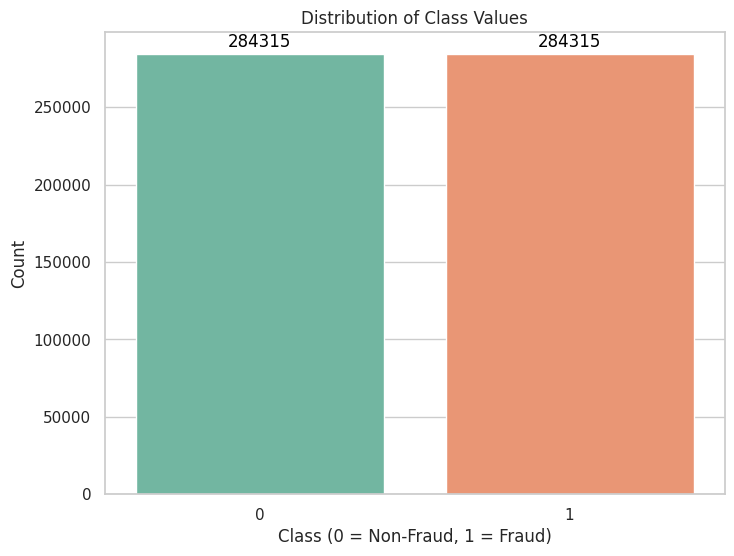

In [10]:

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for the histogram
plt.figure(figsize=(8, 6))

# Plot histogram for 'Class' column
ax = sns.countplot(x='Class', data=df, palette='Set2')

# Set plot labels and title
plt.title('Distribution of Class Values')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

In [11]:
#Final preprocessing  - drop column 'id' and 'class' columns

df = df.drop(columns=['id'])
y = df['Class']
X = df.drop(columns=['Class'])

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Normalization and Scaling

In [12]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (Principal Component Analysis) - optimize dimensionality

In [13]:
# PCA
pca = PCA(n_components= 3 )  # number of components is 3
X_pca = pca.fit_transform(X_scaled)

# Implementing Kmeans+++

In [14]:
# K-Means++ Clustering
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_pca)



              precision    recall  f1-score   support

           0       0.70      1.00      0.82    284315
           1       1.00      0.56      0.72    284315

    accuracy                           0.78    568630
   macro avg       0.85      0.78      0.77    568630
weighted avg       0.85      0.78      0.77    568630



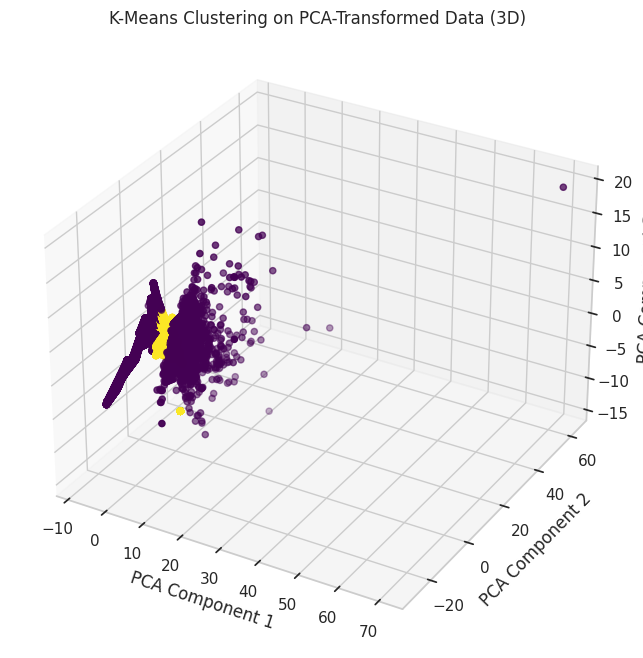

In [15]:
# Cluster Evaluation
# cluster 0 is non-fraud and cluster 1 is fraud
clusters = (clusters == 0).astype(int)
print(classification_report(y, clusters))

# Import for 3D plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with three PCA components
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis')

# Set labels for each axis
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Set plot title
plt.title('K-Means Clustering on PCA-Transformed Data (3D)')

# Show plot
plt.show()